In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

### Scenario-2: Ergo Plastics 
    Ergo plastics was found in 1973; one of the oldest and largest plastic manufacturing industry across the 
    world. Recently, they have been developing in a new plastic material which can withstand high pressure and 
    temperature. They have collected the data in a csv format. Task is to compute how much pressure can stand 
    a given piece of plastic when applied on it some strength at a fixed temperature. No further information about 
    the data is available. 
    
    Dataset Description: 
    • Strength: real [12.4,48.7]
    • Temperature: real [200.0,300.0]
    • Pressure: real [10.0,20.0]
    
    Task to be performed: 
    • Read the dataset with no headers; Then put respective columns names and find the correlation between
    the features - Beginner
    • Split the data in train-test set and fit a Linear Regression model. Find the coeficients and intercepts -
    Beginner
    • Find the mean squared error and R2 score of the model over test set and test set Beginner
    • Apply Ridge regression over the train set and find mean squared error and R2 score of the model over
    test set and test set Intermediate
    • Plot the coefficient of ridge model and linear model over a grouped bar graph - Intermediate

In [3]:
df = pd.read_csv('plastic.csv', names=['Strength', 'Temperature', 'Pressure'], header=None)
df.head()

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20


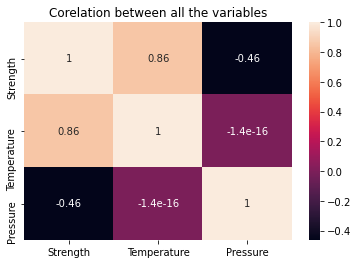

In [5]:
#Corelation between the features
sns.heatmap(df.corr(), annot=True)
plt.title('Corelation between all the variables')
plt.show()

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.intercept_, lr.coef_

(-0.5360184616460302, array([-0.78963701,  0.15678221]))

In [8]:
#Find the mean squared error and R2 score of the model over test set and test set
y_pred = lr.predict(X_test)

print(f"MeanSquareError: {mean_squared_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")

MeanSquareError: 2.146114607340863, R2 Score: 0.8176086638586801


In [11]:
model = Ridge()
model.fit(X_train, y_train)

print(model.intercept_, model.coef_)

#Find the mean squared error and R2 score of the model over test set and test set
y_pred = model.predict(X_test)

print(f"MeanSquareError: {mean_squared_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")

-0.5350461703951943 [-0.78958868  0.15677251]
MeanSquareError: 2.146164753058906, R2 Score: 0.8176044021363637
